In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# для виводу граф. зображень тільки у notebook

# Зчитування даних та їх фільтрування за певними умовами:

In [57]:
DATA = pd.read_csv('adult.data', sep=',')
print ('Робочі колонки: ',', '.join(DATA.columns))
DATA.head()

Робочі колонки:  age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
white_rich_male = round(len(DATA[(DATA['sex'] == 'Male') & (DATA['race'] == 'White') & (DATA['salary'] == '>50K')])/len(DATA) * 100, 2)
print(f'Процентний вміст білих багатих чоловіків -{white_rich_male}%')


Процентний вміст білих багатих чоловіків -18.7%


# 1. Ознаки
## 1.1 Кількісна ознака

Text(0, 0.5, 'Probability')

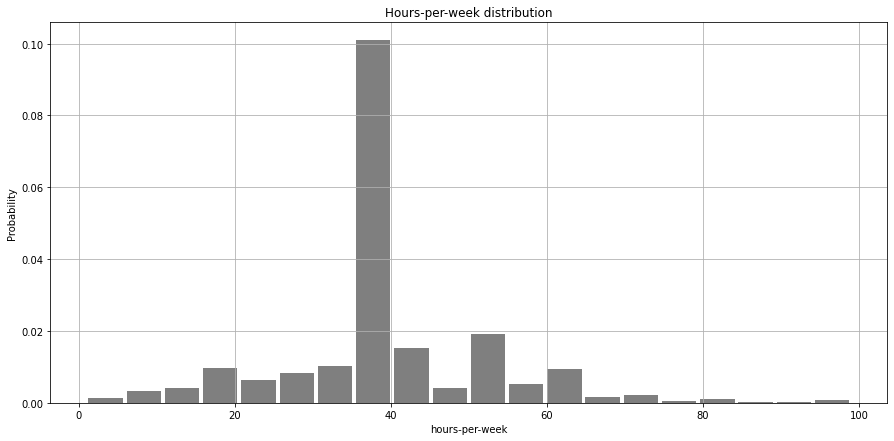

In [59]:
# Гістограма
DATA['hours-per-week'].hist(color='black', alpha=0.5, density=True, bins=20, rwidth=0.9, figsize=(15, 7));
plt.title('Hours-per-week distribution')
plt.xlabel('hours-per-week')
plt.ylabel('Probability')

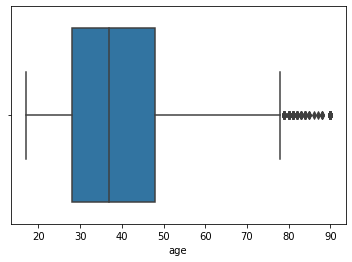

In [60]:
# "Ящик із вусами (медіана, квартилі, межі інтерквартильного розмаху = 1.5 * відстань від медіани, викиди- точки за вусами)"
sns.boxplot(x = DATA['age']);

c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


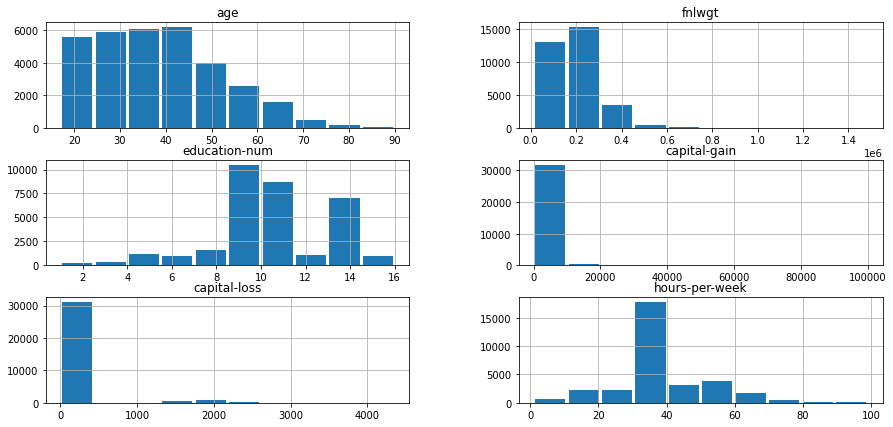

In [61]:
# Гістограми для усієї таблиці
DATA.hist(rwidth=0.9, figsize=(15, 7));

## 1.2 Категорна ознака

In [62]:
# Вивід кількості елементів категорій
DATA['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

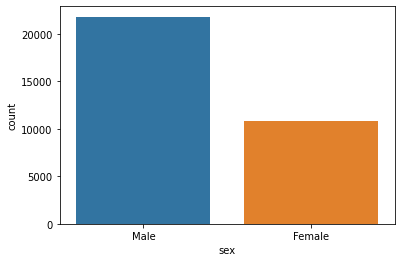

In [63]:
sns.countplot(x = DATA['sex'] ); 

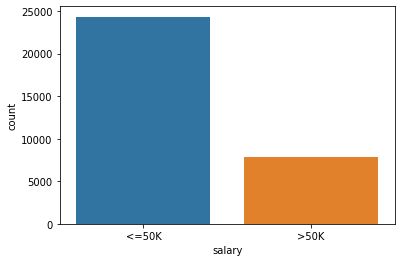

In [64]:
# Вивід зе певної умови через "isin()"
sns.countplot(x = DATA[DATA['marital-status'].isin(DATA['marital-status'].value_counts().head().index)]['salary']);

# Взаємодія ознак

## 2.1 Кількісно - кількісна

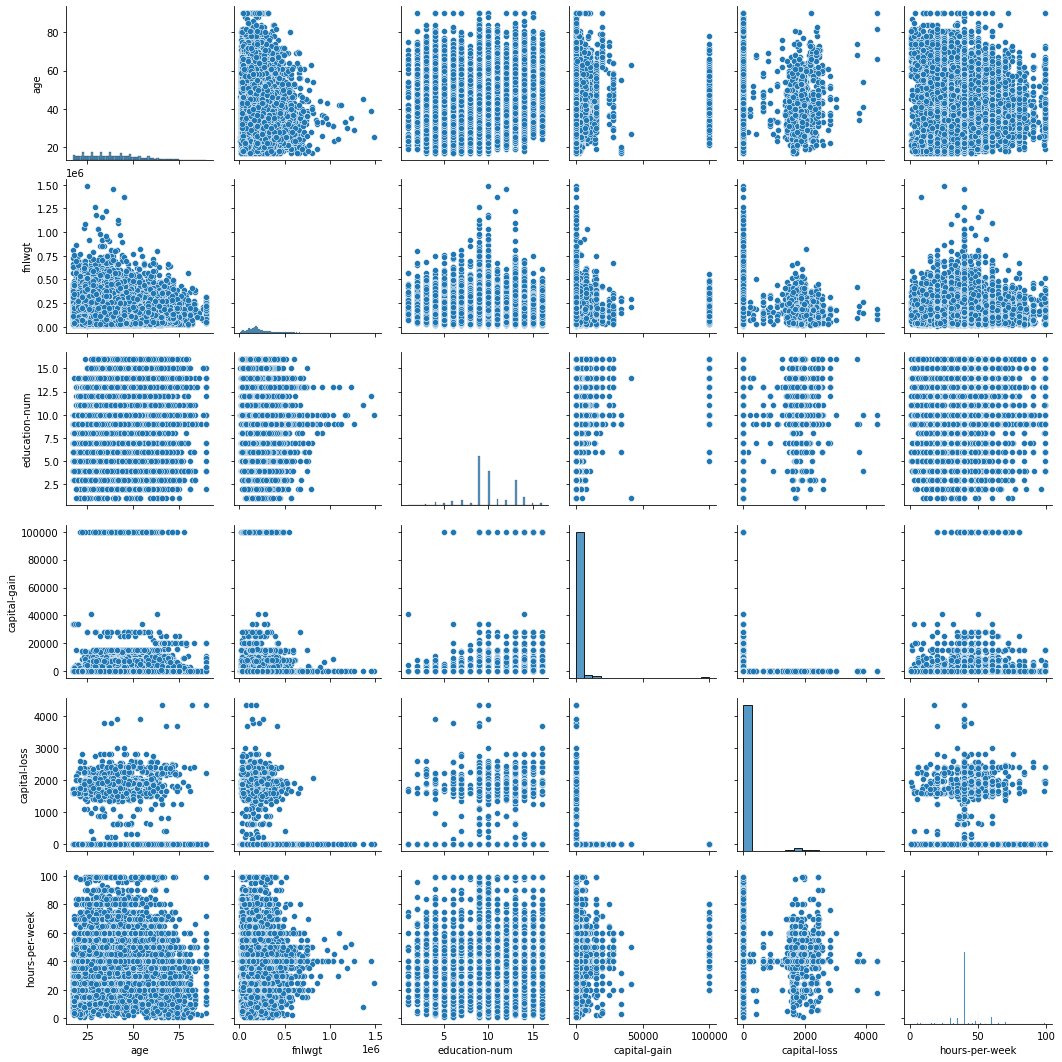

In [65]:
feat = [f for f in DATA.columns if not 'occupation' in f]
sns.pairplot(DATA[feat]);

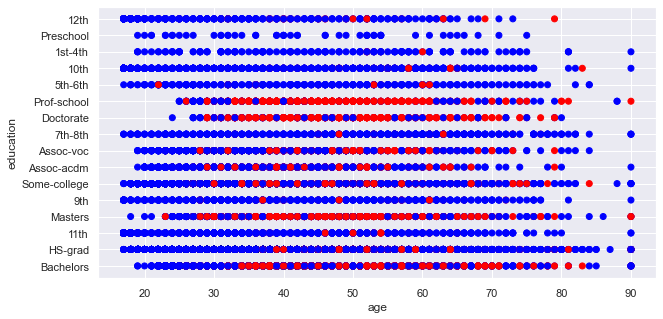

In [84]:
# Вивід розкиду 
s = DATA['salary'].map({'<=50K': 'blue', '>50K': 'red'})

plt.xlabel('age')
plt.ylabel('education')
plt.figsize=(20, 10)
plt.scatter(DATA['age'], DATA['education'], color = s);

In [67]:
# Кореляція Пірсона між стовпцями таблиці
DATA.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


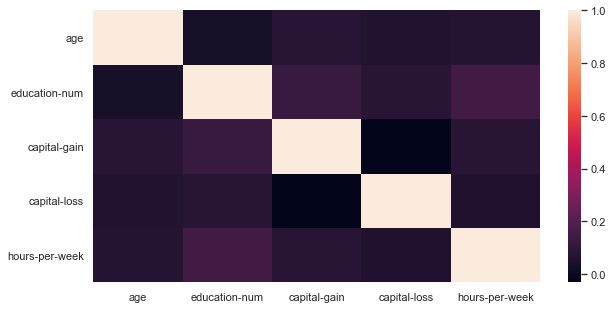

In [85]:
# Карта кореляції усіх пар ознак для "Seaborn" 
sns.heatmap(DATA.corr());
sns.set(rc={'figure.figsize':(8,3)})

In [69]:
# Видалення деяких колонок без змін у самій БД (inplace = False)
DATA.drop('fnlwgt', axis = 1, inplace = True)

## 2.2 Кількісно-категоріальна + кількісно-бінарна ознаки 

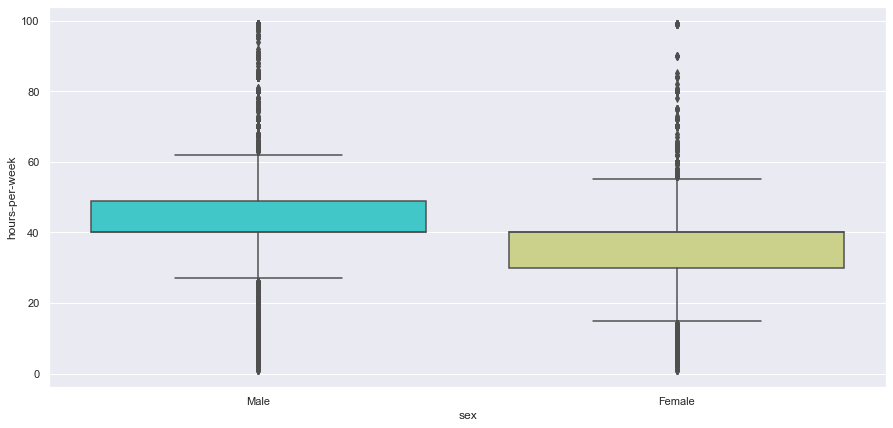

In [101]:
sns.boxplot(x = 'sex', y = 'hours-per-week', data = DATA, palette='rainbow');
sns.set(rc={'figure.figsize':(15,5)}) # Задавання розміру графіка

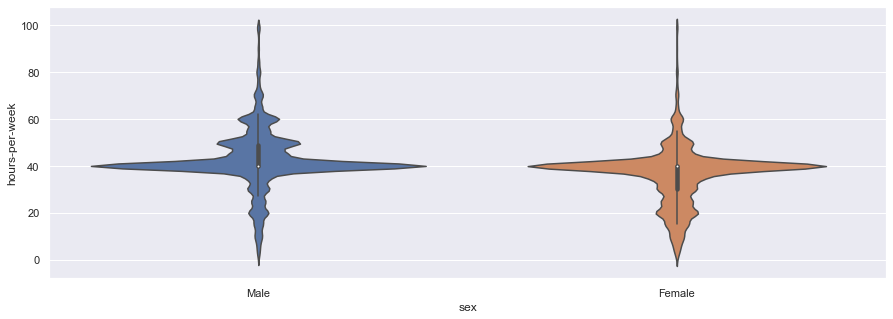

In [102]:
sns.violinplot(x = 'sex', y = 'hours-per-week', data = DATA);

In [103]:
# Групування за статтю для медіани тижневих робочих годин 
DATA.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

## 2.3 Категорно - категорні ознаки

In [105]:
# Звідна таблиця
pd.crosstab(DATA['occupation'], DATA['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,,
?,102,119,40,12,30,73,51,47,61,173,15,533,48,5,18,516
Adm-clerical,38,67,38,0,6,11,14,193,167,506,5,1365,68,2,9,1281
Armed-Forces,0,0,1,0,0,0,0,0,0,1,0,4,1,0,0,2
Craft-repair,170,175,58,23,43,116,96,115,252,226,2,1922,22,4,7,868
Exec-managerial,24,34,13,4,1,19,13,145,150,1369,55,807,501,0,52,879
Farming-fishing,44,37,16,18,36,70,28,14,52,77,1,404,10,9,4,174
Handlers-cleaners,71,123,38,16,40,46,49,24,28,50,0,611,5,2,0,267
Machine-op-inspct,101,99,35,23,56,93,76,33,63,69,1,1023,8,11,1,310
Other-service,194,238,85,40,64,98,101,78,115,181,1,1281,19,15,4,781


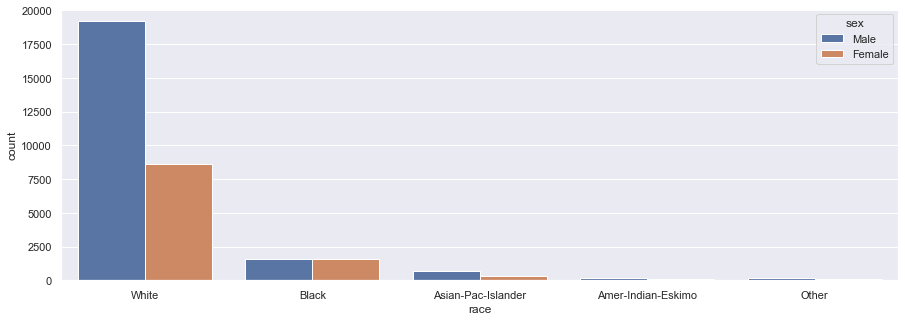

In [112]:
# побудова за к-стю входжень вибірки в умови
sns.countplot(x = 'race', hue = 'sex', data = DATA);

In [113]:
# Гіпотеза компактності (t-SNE) - кучкування даних у певних областях-кластерах
from sklearn.manifold import TSNE

In [157]:
DATA['sex'] = DATA['sex'].map({'Male': 0, 'Female': 1})

DATA['salary'] = DATA['salary'].map({'<=50K': 0, '>50K': 1})
DATA[['age', 'sex', 'salary']].head()

,age,sex,salary
0,39,0,0
1,50,0,0
2,38,0,0
3,53,0,0
4,28,1,0


In [181]:
%%time
tsne = TSNE(random_state = 0)
data = DATA[['age', 'sex', 'salary', 'hours-per-week', 'capital-gain']].head(3000)
tsne.fit(data)
print(f'Розмірність таблиці "data":{data.shape}')

Розмірність таблиці "data":(3000, 5)
Wall time: 10.9 s


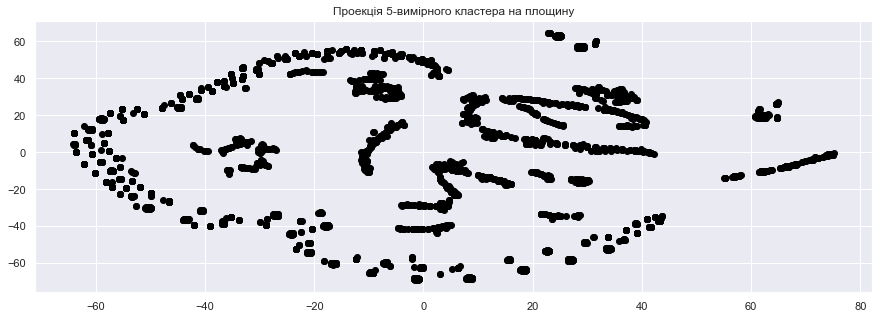

In [186]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], color = 'black');
plt.title(f'Проекція {data.shape[1]}-вимірного кластера на площину');